### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [4]:
#install.packages ("cluster")

           WATER PROTEIN  FAT LACTOSE  ASH
HORSE       90.1     2.6  1.0     6.9 0.35
ORANGUTAN   88.5     1.4  3.5     6.0 0.24
MONKEY      88.4     2.2  2.7     6.4 0.18
DONKEY      90.3     1.7  1.4     6.2 0.40
HIPPO       90.4     0.6  4.5     4.4 0.10
CAMEL       87.7     3.5  3.4     4.8 0.71
BISON       86.9     4.8  1.7     5.7 0.90
BUFFALO     82.1     5.9  7.9     4.7 0.78
GUINEA_PIG  81.9     7.4  7.2     2.7 0.85
CAT         81.6    10.1  6.3     4.4 0.75
FOX         81.6     6.6  5.9     4.9 0.93
LLAMA       86.5     3.9  3.2     5.6 0.80
MULE        90.0     2.0  1.8     5.5 0.47
PIG         82.8     7.1  5.1     3.7 1.10
ZEBRA       86.2     3.0  4.8     5.3 0.70
SHEEP       82.0     5.6  6.4     4.7 0.91
DOG         76.3     9.3  9.5     3.0 1.20
ELEPHANT    70.7     3.6 17.6     5.6 0.63
RABBIT      71.3    12.3 13.1     1.9 2.30
RAT         72.5     9.2 12.6     3.3 1.40
DEER        65.9    10.4 19.7     2.6 1.40
REINDEER    64.8    10.7 20.3     2.5 1.40
WHALE      

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

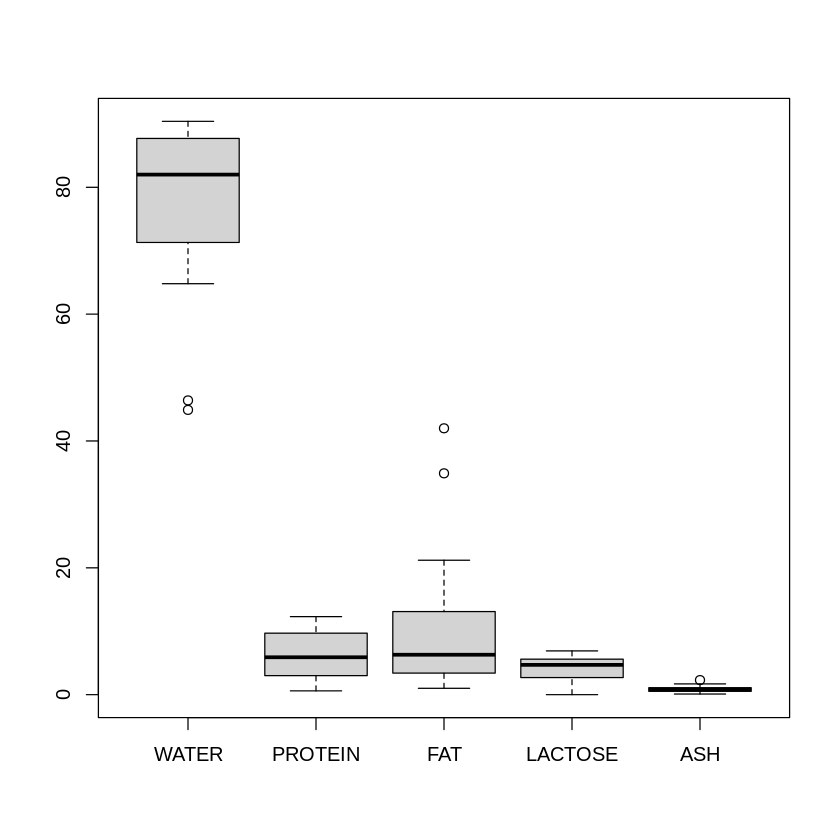

In [20]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
print(datos)
summary(datos)
boxplot(datos)

In [21]:
datos

,WATER,PROTEIN,FAT,LACTOSE,ASH
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA_PIG,81.9,7.4,7.2,2.7,0.85


**Descripción de los datos y porque realizar un análisis de agrupamiento**

Se trata de un conjunto de datos que describen la composición de la leche de 25 mamíferos. Se consideran 5 características en porcentajes: agua, proteína, grasa, lactosa y calcio. Se puede observar del boxplot que, en promedio, el mayor porcentaje de todas las leches es agua (cerca de 80%), seguido de proteína, grasa y lactosa (cerca del 5%) y bastante menor porcentaje de calcio (0,8%). Las componente que tienen mayor variación son el porcentaje de agua y de grasa. Parece pertinente realizar un análisis de agrupamiento para distinguir grupos de mamíferos que poseen leches de características similares.

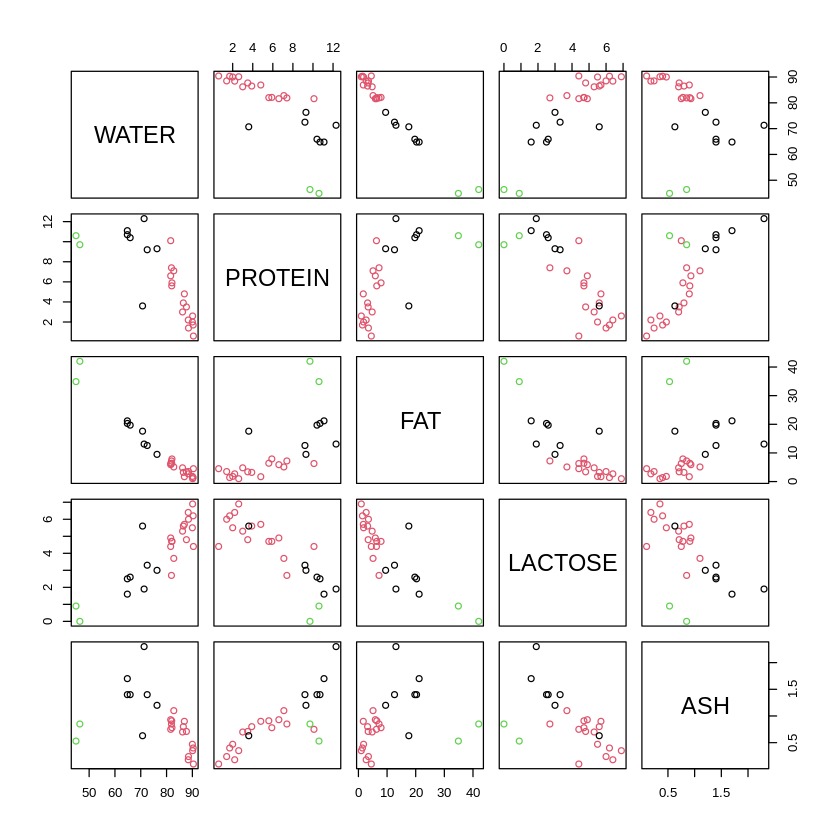

In [22]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 3 grupos con el algoritmo KMeans, se obtienen grupos claramente diferenciados por las variables porcentaje de agua y grasa. El grupo negro (focas y delfines), con los menores porcentajes de agua y mayores porcentajes de grasa. El grupo rojo, con 6 mamíferos, cuyas leches tienen porcentajes intermedios de agua (60 a 75%) y grasa (12 a 22%). Y luego el grupo verde, el mas común, con 17 mamíferos, cuyas leches tienen mas de 75% de agua y menos de 10% de grasa. Las otras variables no permiten discriminar completamente los 3 grupos definidos.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
2,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
3,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957


K-means clustering with 3 clusters of sizes 7, 16, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 69.47143  9.514286 16.28571 2.928571 1.432857
2 86.06250  4.275000  4.17500 5.118750 0.635625
3 45.65000 10.150000 38.45000 0.450000 0.690000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          1          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          3          3 

Within cluster sum of squares by cluster:
[1] 299.9911 377.2215  27.1912
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

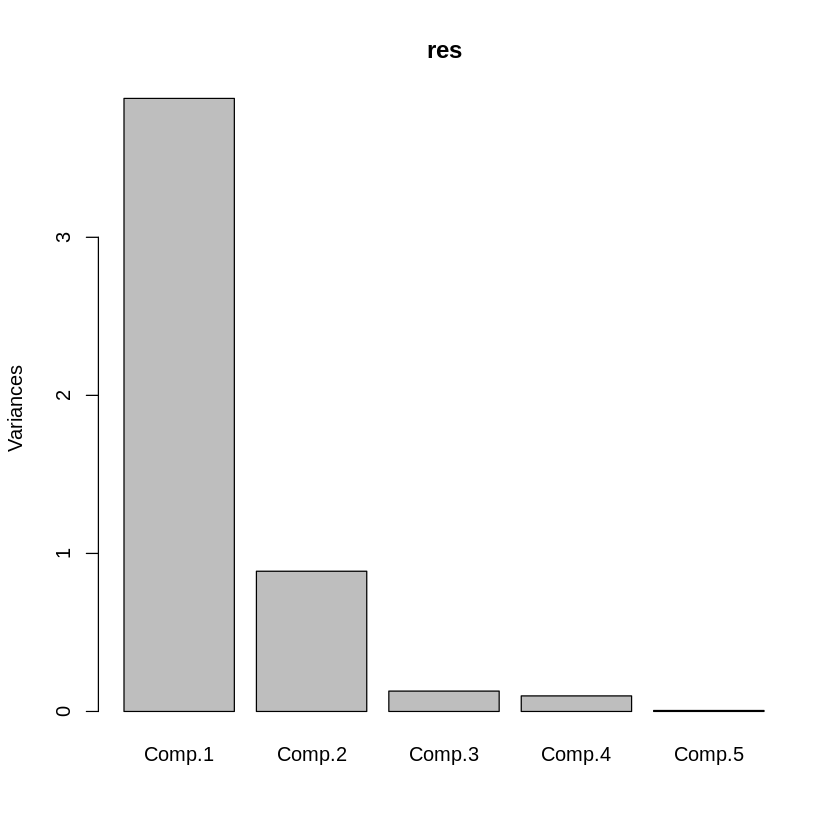

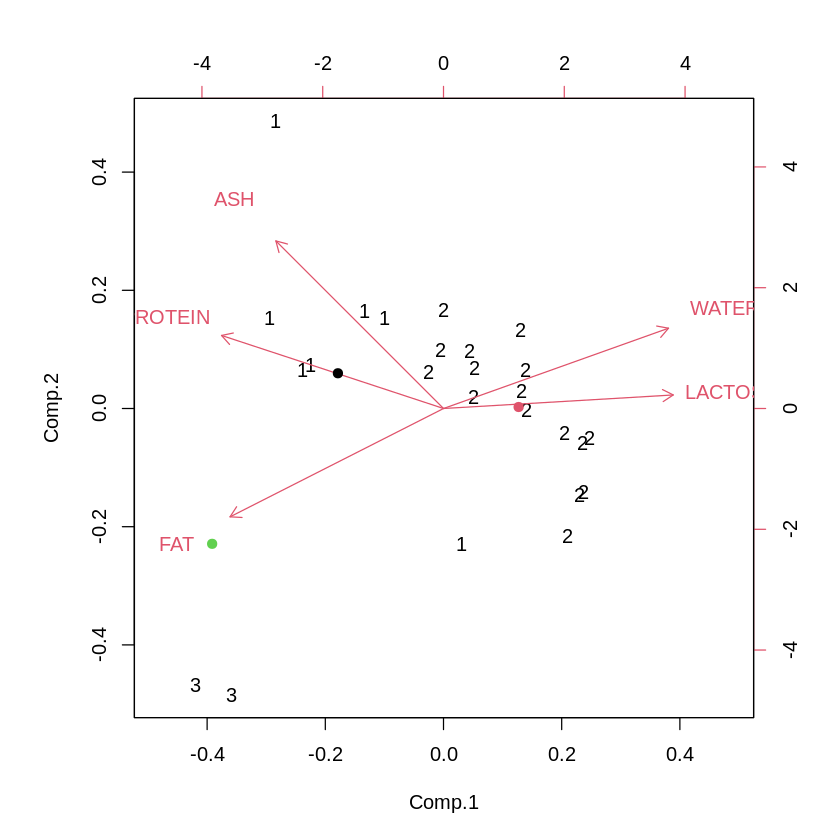

In [23]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 3 representa a los individuos con mayores valores de FAT, mientras corresponde a los mamíferos con mayores porcentajes de agua y lactosa y por otra parte el grupo 2 contiene mamíferos con mayores porcentajes de proteína y calcio (a excepción de un caso).

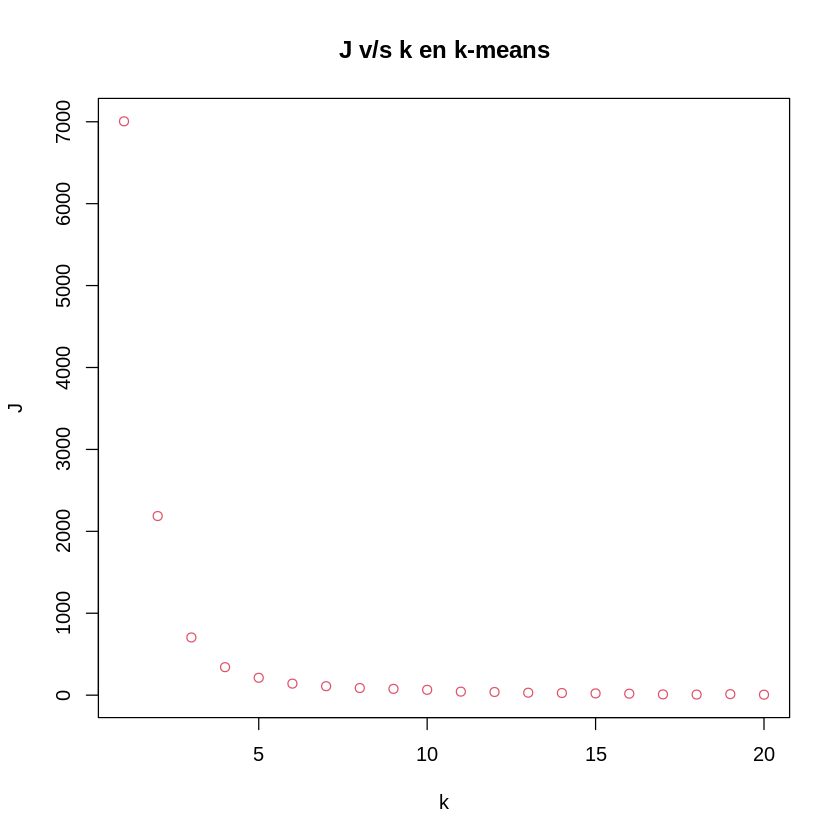

In [24]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

---

### Ejercicio 1:
1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Agregue código para automatizar este criterio.  
2. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados.
    

1) De acuerdo al gráfico obtenido, el K más apropiado se encuentra entre 3 y 4.

In [25]:
#c: criterio de porcentaje de mejora en función de perdida respecto al k anterior
kideal<-function(wss, c){
    ki<-2  #partiendo de la base que k debería ser al menos dos para el funcionamiento de kmeans 
    i<-3
    n <- 1-(wss[i]/wss[i-1])
    while (n>=c && i<length(wss)){
        ki<-i
        i<-i+1
        n <- 1-(wss[i]/wss[i-1])
    }
    ki
}
ki<-kideal(J, 0.5)
ki

[1] 4

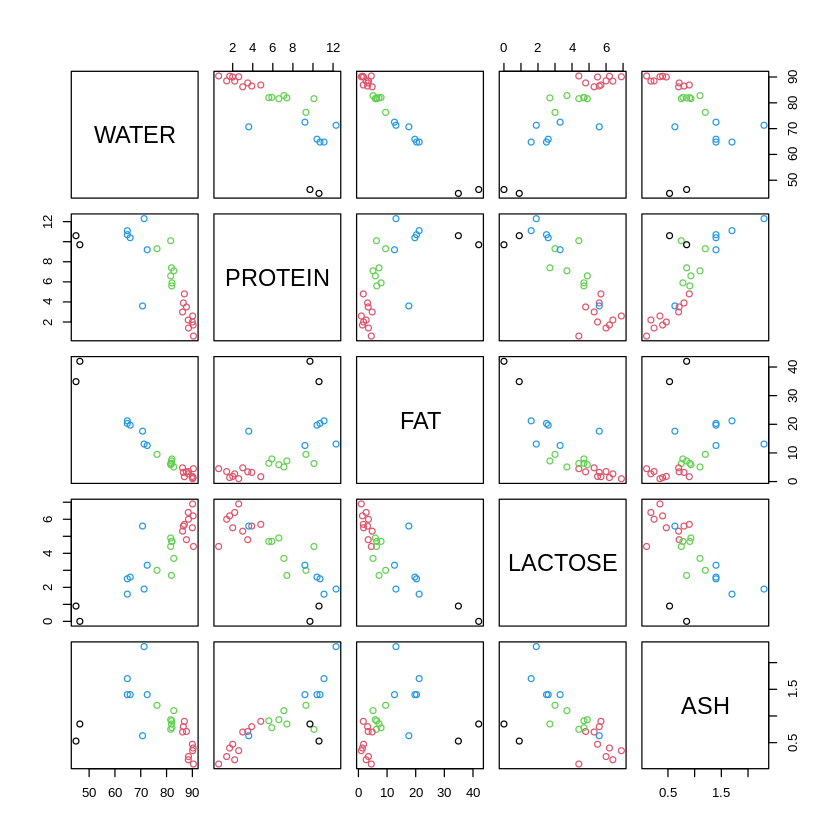

In [26]:
cl_i<-kmeans(datos,ki,iter.max=1000,nstart=10)
pairs(datos,col=cl_i$cluster)


Con K = 4 como nº ideal de clusters, notamos que los 4 grupos están bien diferenciados entre las variables porcentaje de agua y grasa, y porcentaje de agua y lactosa, donde la primera relación es inversa mientras que la segunda es directa.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957
2,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286
3,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595
4,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768


K-means clustering with 4 clusters of sizes 2, 10, 7, 6

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 45.65000 10.150000 38.45000 0.450000 0.6900000
2 88.50000  2.570000  2.80000 5.680000 0.4850000
3 81.18571  7.428571  6.90000 4.014286 0.9314286
4 68.33333  9.550000 17.41667 2.916667 1.4716667

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          2          2          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          3          3          4          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          1          1 

Within cluster sum of squares by cluster:
[1]  27.19120  59.41225  63.53491 191.74708
 (between_SS / tot

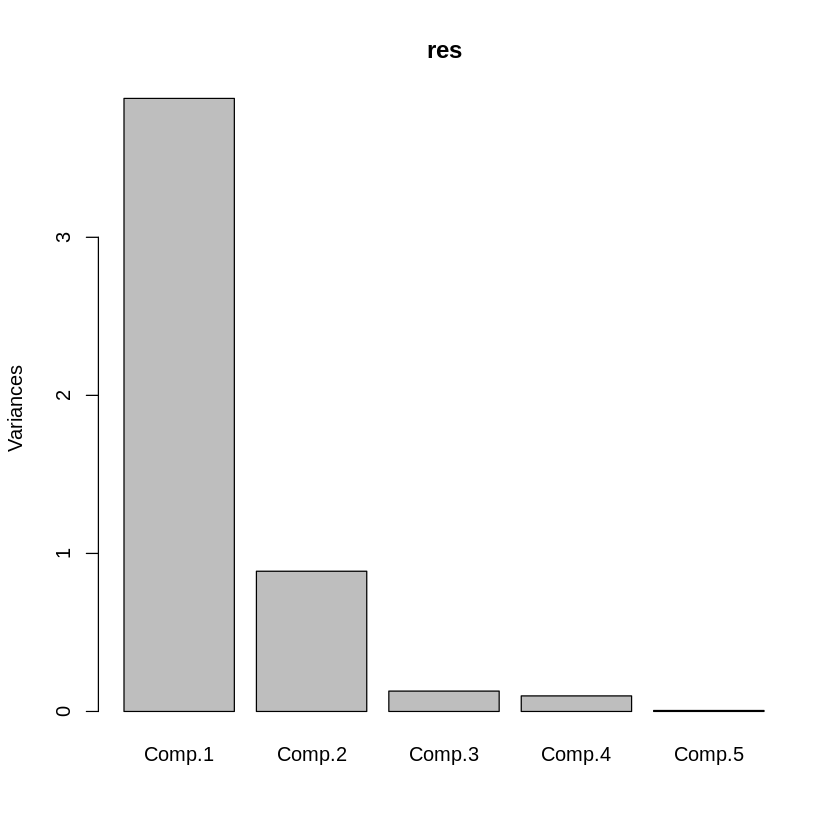

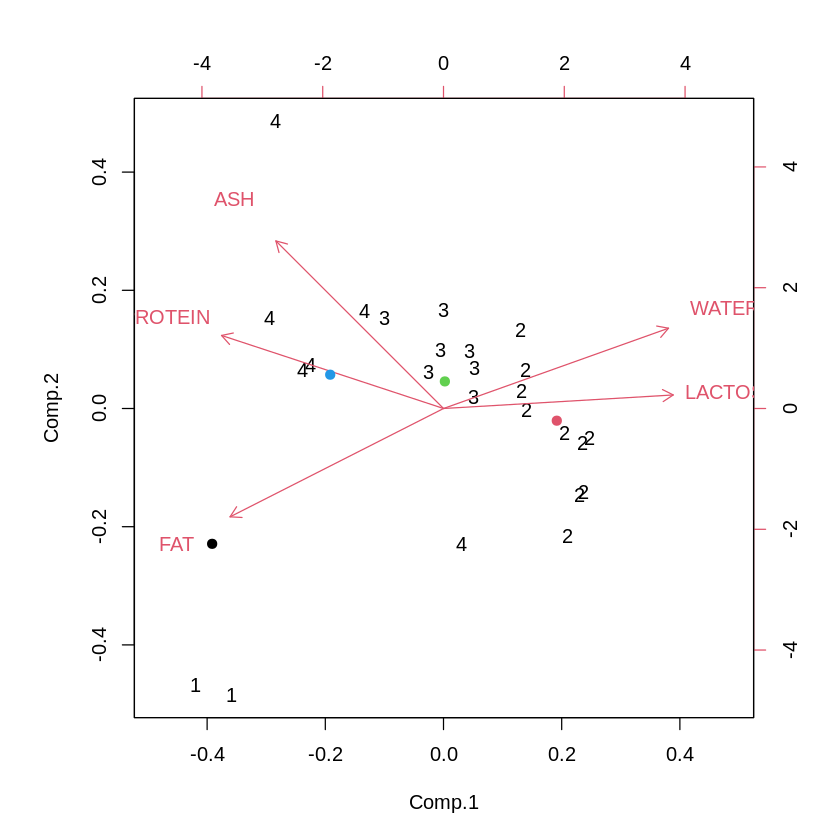

In [27]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl_i$centers)
res2
cl_i
biplot(res,xlabs=cl_i$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:ki,pch=19)

### Caracterización de datos 

In [28]:
datos$cl_num<-cl_i$cluster
datos

,WATER,PROTEIN,FAT,LACTOSE,ASH,cl_num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
HORSE,90.1,2.6,1.0,6.9,0.35,2
ORANGUTAN,88.5,1.4,3.5,6.0,0.24,2
MONKEY,88.4,2.2,2.7,6.4,0.18,2
DONKEY,90.3,1.7,1.4,6.2,0.40,2
HIPPO,90.4,0.6,4.5,4.4,0.10,2
CAMEL,87.7,3.5,3.4,4.8,0.71,2
BISON,86.9,4.8,1.7,5.7,0.90,2
BUFFALO,82.1,5.9,7.9,4.7,0.78,3
GUINEA_PIG,81.9,7.4,7.2,2.7,0.85,3


In [37]:
sort(tapply(datos$WATER, datos$cl_num, mean))      #tapply(X, INDEX, FUN = NULL, …, default = NA, simplify = TRUE)
sort(tapply(datos$PROTEIN, datos$cl_num, mean))    #X, INDEX vectores del mismo largo, FUN función a aplicar
sort(tapply(datos$FAT, datos$cl_num, mean))
sort(tapply(datos$LACTOSE, datos$cl_num, mean))
sort(tapply(datos$ASH, datos$cl_num, mean))

1        4        3        2 
45.65000 68.33333 81.18571 88.50000

2         3         4         1 
 2.570000  7.428571  9.550000 10.150000

2        3        4        1 
 2.80000  6.90000 17.41667 38.45000

1        4        3        2 
0.450000 2.916667 4.014286 5.680000

2         1         3         4 
0.4850000 0.6900000 0.9314286 1.4716667

Si se evaluan los 4 grupos de datos de acuerdo a su media, ordenados de menor a mayor, es posible caracterizar a los grupos de acuerdo a:

* Cluster **1**: Predominante en los valores de Proteina y Grasa.
* Cluster **2**: Altos valores de agua y lactosa en su leche, con los menores aportes de grasa, proteina y calcio.
* Cluster **3**: Grupo de aporte balanceado, caracterizado principalmente por agua y lactosa.
* Cluster **4**: Predomina su aporte de calcio por sobre el resto de nutrientes.


In [39]:
sort(tapply(datos$WATER, datos$cl_num, var))
sort(tapply(datos$PROTEIN, datos$cl_num, var))
sort(tapply(datos$FAT, datos$cl_num, var))
sort(tapply(datos$LACTOSE, datos$cl_num, var))
sort(tapply(datos$ASH, datos$cl_num, var))

1         2         3         4 
 1.125000  2.684444  4.804762 12.530667

1        2        3        4 
0.405000 1.584556 2.852381 9.507000

2         3         4         1 
 1.702222  2.116667 13.941667 25.205000

1         2         3         4 
0.4050000 0.5528889 0.7880952 2.0776667

3          1          2          4 
0.02724762 0.05120000 0.07725000 0.29241667

En cambio, si se comparar de acuerdo a su varianza (ignorando la diferencia de cardinalidad entr grupos), es posible observar que:
* Cluster **1**: Posee las menores varianzas en sus diversos componentes, siendo el cluster una buena representación de sus elementos.
* Cluster **2**: Similar al anterior, posee bajas diferencias entre sus componentes siendo altamente concentrado.
* Cluster **3**: Presenta sus mayores variaciones en los componentes de agua y nutrientes, siendo más regular en los otros.
* Cluster **4**: Con una varianza significativa es el grupo más disperso, a causa de sólo identificarse por un alto valor de calcio.


---

### Ejercicio 2:

Realice un análisis de clustering con el conjunto de datos comunas.csv. 
1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


#### **Respuesta 2.1**

In [79]:
datos <- read.csv("comunas.csv",header=TRUE,sep=";",dec=".", fileEncoding="latin1")

In [80]:
datos

Regi.n,Comuna,Poblaci.n..miles..2011,IDSE,Ingreso.per.c.p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aØos..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aØos..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aØos.2011,Mortalidad.Infantil.x.1000.NV.2009.11
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Iquique,186.0,0.698,227.6,10.2,11.1,81.8,98.8,77.2,0.631,82.1,73.0,8.9
1,Pica,18.6,0.604,188.1,12.2,9.6,71.0,94.0,77.5,0.572,23.0,45.8,9.8
1,Pozo Almonte,17.3,0.591,176.0,9.8,9.7,73.1,83.5,77.3,0.574,44.3,66.7,7.1
1,Alto Hospicio,93.8,0.577,166.3,20.9,10.1,65.9,98.4,78.1,0.555,46.7,56.2,4.9
1,Huara,3.4,0.382,161.4,10.0,7.6,49.0,38.9,81.8,0.592,55.8,44.4,8.9
2,Calama,148.8,0.717,269.3,8.5,10.9,85.0,98.9,76.2,0.625,87.2,63.4,9.7
2,Antofagasta,373.0,0.714,256.5,7.1,11.0,80.6,99.0,76.1,0.627,75.1,72.2,7.3
2,Marða Elena,3.7,0.698,218.9,6.1,10.9,77.6,98.1,72.0,0.536,74.6,66.7,0.0
2,Mejillones,11.1,0.697,228.8,5.8,10.1,88.6,99.1,74.9,0.571,59.1,65.8,2.1


In [81]:
dim(datos)
datos1 <- as.matrix(datos[1:323,3:14])
row.names(datos1) = datos[,1]
datos2 <- matrix(as.numeric(datos1),ncol=12,nrow=323,byrow=FALSE)
tail(datos2)

[1] 323  14

"[318,]",18.4,0.488,152.4,20.2,8.4,87.2,66.5,74.9,0.437,98.2,77.9,13.7
"[319,]",15.8,0.467,129.9,20.8,8.3,79.6,70.7,75.9,0.438,73.8,69.9,0.0
"[320,]",5.0,0.444,115.0,19.2,7.9,87.2,60.8,76.4,0.435,66.1,70.0,10.2
"[321,]",35.1,0.424,126.5,23.5,7.7,81.2,64.7,75.9,0.406,93.8,73.8,9.2
"[322,]",9.5,0.418,134.9,21.3,7.9,86.3,49.0,73.2,0.372,111.9,73.1,6.0
"[323,]",179.0,0.643,228.7,15.7,10.9,75.1,91.2,77.1,0.601,86.8,75.0,7.5


## **Descripción de los datos y porque realizar un análisis de agrupamiento**


Esta tabla contiene los datos asociados a las caracteristicas socio-economicas y de salud que presentan 323 comunas de Chile, de las cuales consideraremos 12 caracteristicas: **Porcentaje de pobreza, Porcentaje de material de vivienda bueno o malo, Porcentaje de alcantarillado o fosa séptica , Porcentaje de defunción para personas mayores a 50 años, Población en miles de habitantes, Ingreso Mensual por persona(miles $), Tasa de AVVP x1000 horas, Mortalidad infantil X1000 NV, IDSE, Escolaridad, Índice de desarrollo Humano, Esperanza de vida al nacer**.

Debido a la cantidad de variables involucradas, se puede plantear la posibilidad de realizar un agrupamiento general de los datos, lo que entregaría una correlación de variables dificilmente observarble en un espacio bidimensional, pero que separada de a pares permitiría visualizar las diferencias o superposiciones propias de los grupos.

Por otra parte, realizar múltiples agrupaciones de las variables, que pertenezcan a escalas similares (valor en miles, porcentajes e índices) facilita enormemente su representación pero necesariamente excluye información importante como lo es la cantidad de habitantes para los índices o el porcentaje de pobreza si se está agrupando por escolaridad.

A continuación y con el motivo de segregar de mejor manera la información, se optará por el segundo método, permitiendo el análisis particular de ciertas variables sociales.

#### **Respuesta 2.2**

**Conjunto 1** 
* Porcentaje de pobreza
* Porcentaje de material de vivienda bueno o malo
* Porcentaje de alcantarillado o fosa séptica
* Porcentaje de defuncion para personas mayores a 50 años)

In [82]:
conjunto1 <- datos2[, c(4,6,7,11)]
colnames(conjunto1) <- c('Pobreza','Material','Alcantarillado','Defuncion')
row.names(conjunto1) <- datos[,2]
head(conjunto1)

,Pobreza,Material,Alcantarillado,Defuncion
Iquique,10.2,81.8,98.8,73.0
Pica,12.2,71.0,94.0,45.8
Pozo Almonte,9.8,73.1,83.5,66.7
Alto Hospicio,20.9,65.9,98.4,56.2
Huara,10.0,49.0,38.9,44.4
Calama,8.5,85.0,98.9,63.4


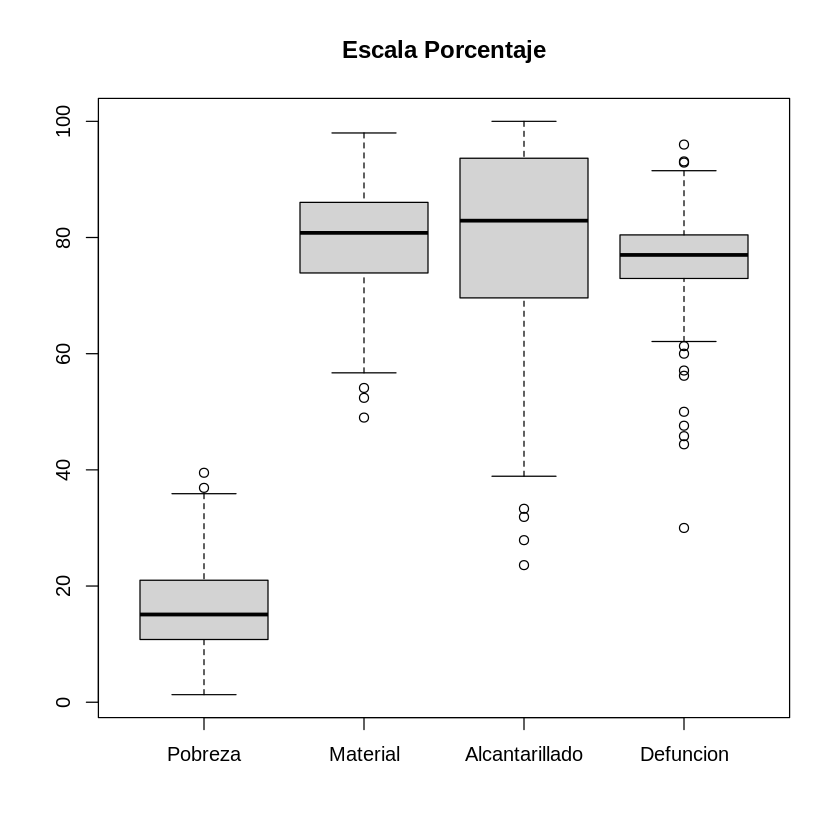

In [83]:
boxplot(conjunto1, main = 'Escala Porcentaje')

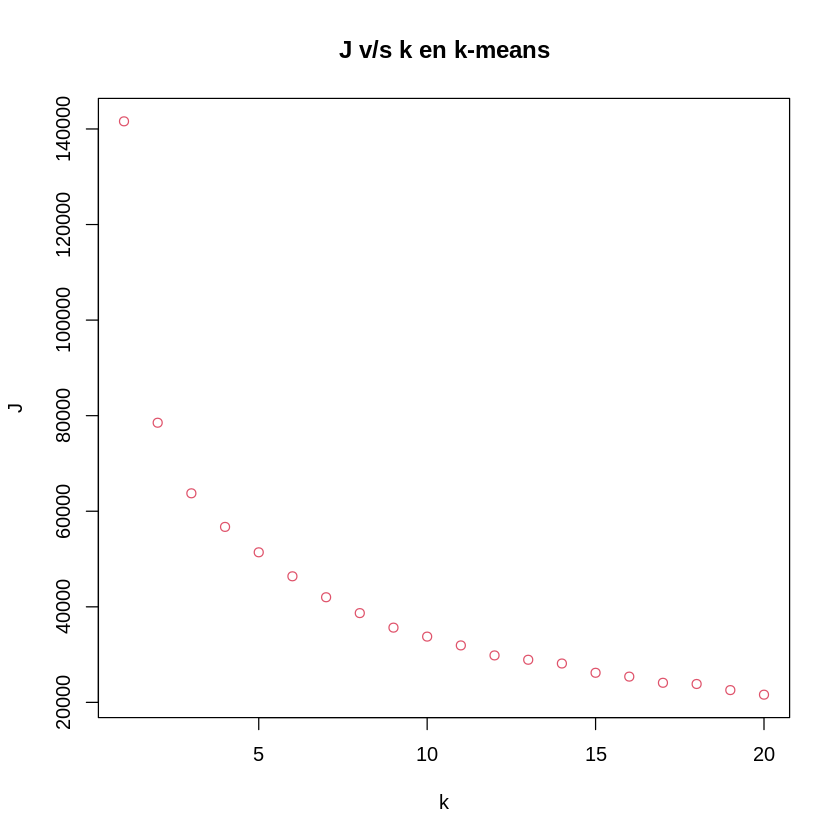

In [85]:
J<-rep(0,20)
fin_iter<-20
for (k in 1:fin_iter){
     cl<-kmeans(conjunto1,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

In [118]:
ki_1<-kideal(J,0.1)
ki_1

[1] 4

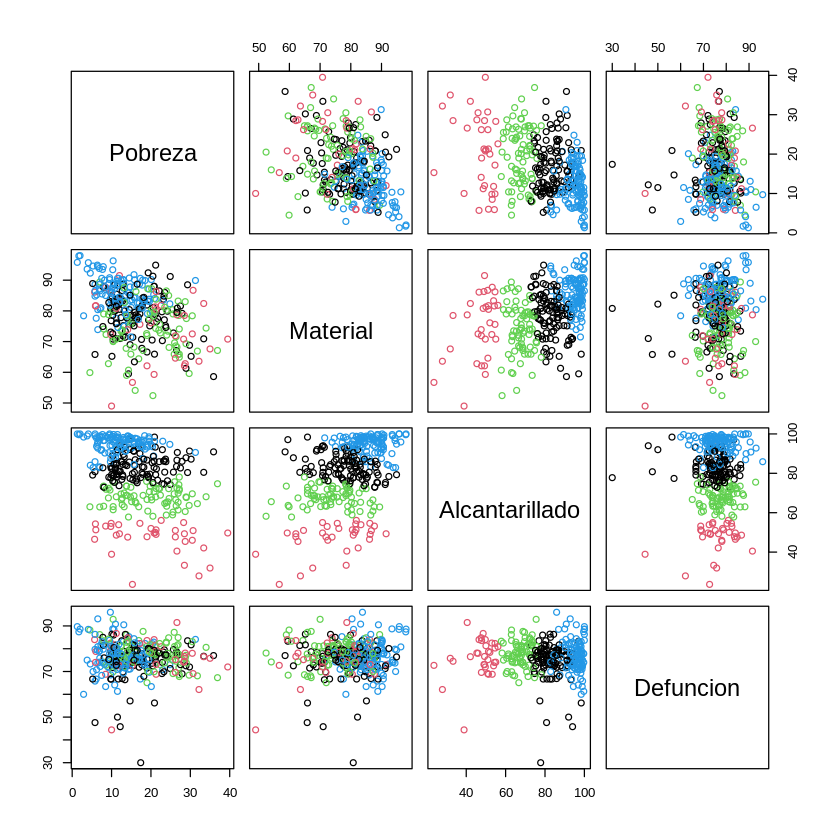

In [120]:
cl<-kmeans(conjunto1,ki_1,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(conjunto1,col=cl$cluster)

De lo anterior, podemos destacar la relación entre Alcantarilla, Pobreza y Material, la cual es notoria por la influencia de la situación socioeconómica entre  menor sea el índice de pobreza mejor infraestructura pueden permitirse las personas de esos segmentos. Mientras que la defunción provee poca información y una alta varianza para todas sus comparaciones.

---

**Conjunto 2** 
* Poblacion en miles de habitantes
* Ingreso Mensual por persona(miles $)
* Tasa de AVVP x1000 horas
* Mortalidad infantil X1000 NV

In [134]:
conjunto2 <- datos2[, c(1,3,10,12)]
colnames(conjunto2) <- c('Poblacion','Ingreso','AVVP','M.Infantil')
row.names(conjunto2) <- datos[,2]
head(conjunto2)

,Poblacion,Ingreso,AVVP,M.Infantil
Iquique,186.0,227.6,82.1,8.9
Pica,18.6,188.1,23.0,9.8
Pozo Almonte,17.3,176.0,44.3,7.1
Alto Hospicio,93.8,166.3,46.7,4.9
Huara,3.4,161.4,55.8,8.9
Calama,148.8,269.3,87.2,9.7


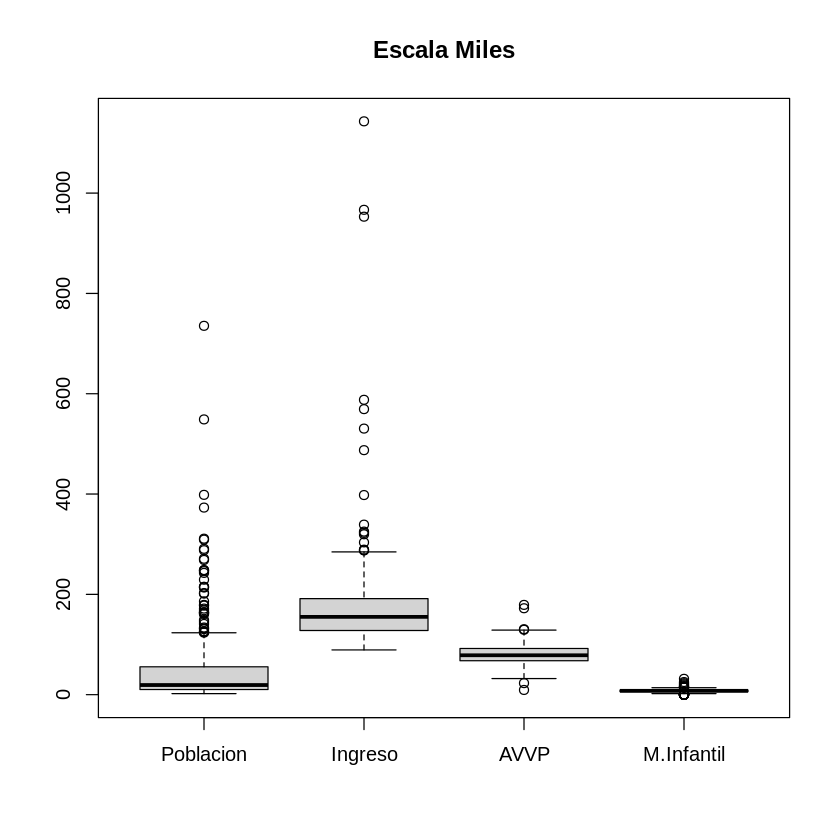

In [135]:
boxplot(conjunto2, main = 'Escala Miles')

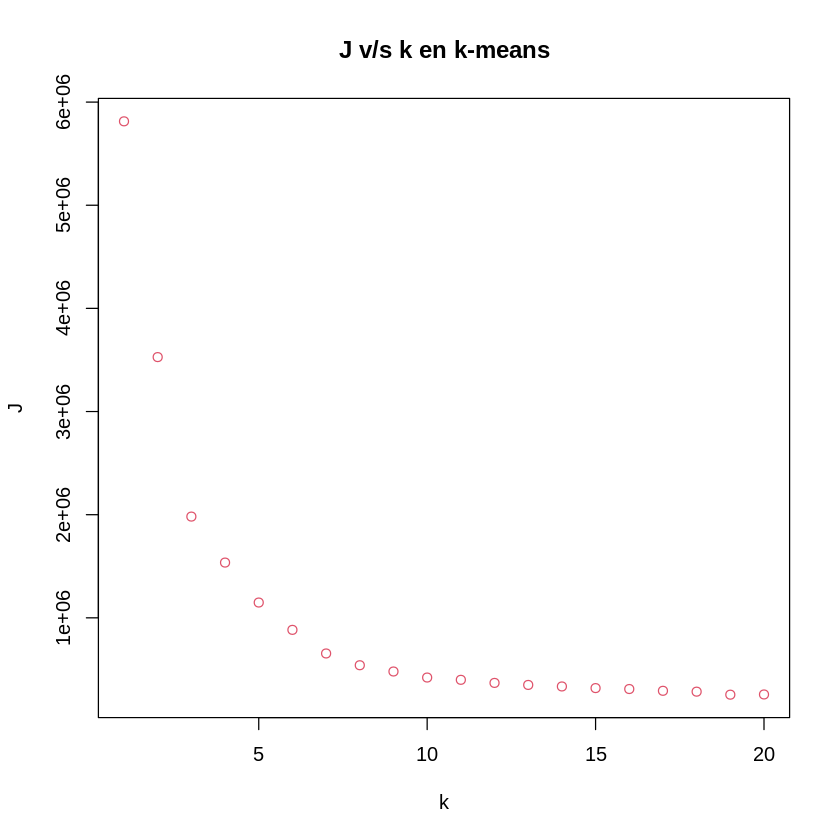

In [136]:
J<-rep(0,20)
fin_iter<-20
for (k in 1:fin_iter){
     cl<-kmeans(conjunto2,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

In [144]:
ki_2<-kideal(J,0.23)
ki_2

[1] 3

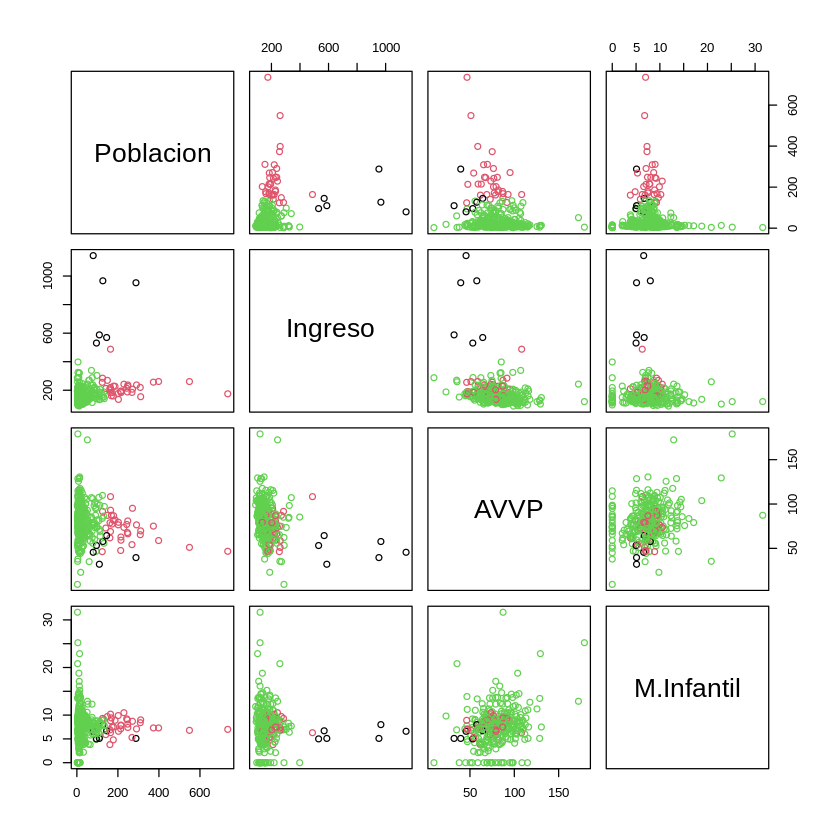

In [145]:
cl<-kmeans(conjunto2,ki_2,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(conjunto2,col=cl$cluster)

En este caso la diferenciación entre variables no es del todo explícita, principalmente debido a que la problemática que se puede analizar (como lo es la muerte infantil o prematura de la población) es transversal a los distintos niveles socioeconómicos pero bastante relacionada al tamaño de la población, concentrándose los datos en aquellas comunas con menos de 100mil habitantes.

A su vez, de los registros con mayores ingresos que se escapan de los grupos concentrados, se puede observar que presentan índices de mortalidad igual de elevados. 


**Conjunto 3**
* IDSE
* Escolaridad
* Índice de desarrollo Humano
* Esperanza de vida al nacer)**

In [146]:
conjunto3 <- datos2[, c(2,5,9,8)]
colnames(conjunto3) <- c('IDSE','Escolaridad','IDH','Esperanza.V')
row.names(conjunto3) <- datos[,2]
head(conjunto3)

,IDSE,Escolaridad,IDH,Esperanza.V
Iquique,0.698,11.1,0.631,77.2
Pica,0.604,9.6,0.572,77.5
Pozo Almonte,0.591,9.7,0.574,77.3
Alto Hospicio,0.577,10.1,0.555,78.1
Huara,0.382,7.6,0.592,81.8
Calama,0.717,10.9,0.625,76.2


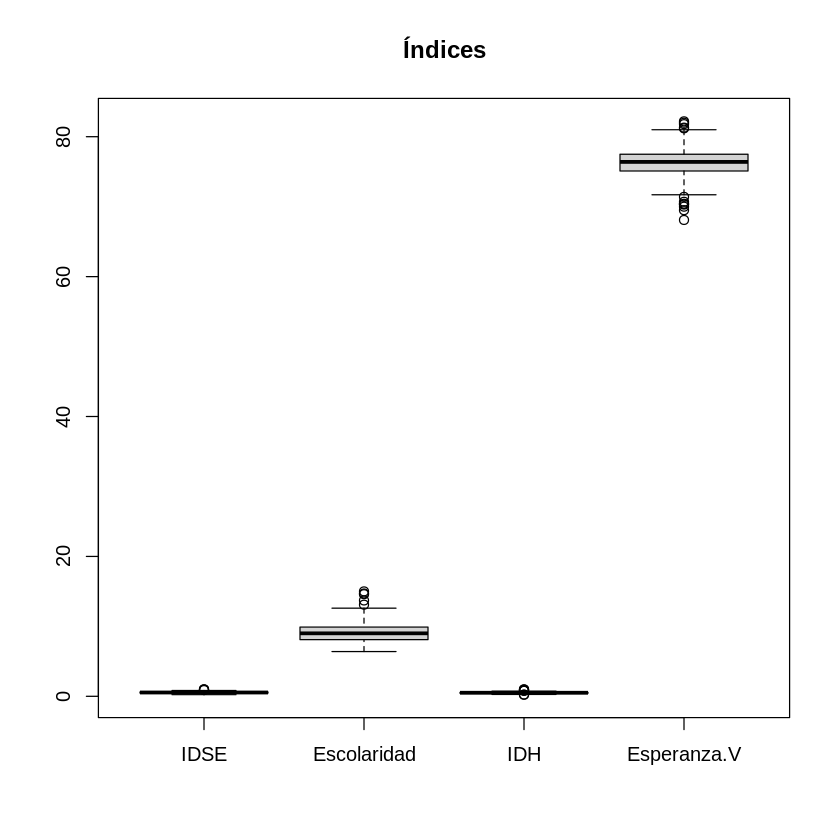

In [147]:
boxplot(conjunto3, main = 'Índices')

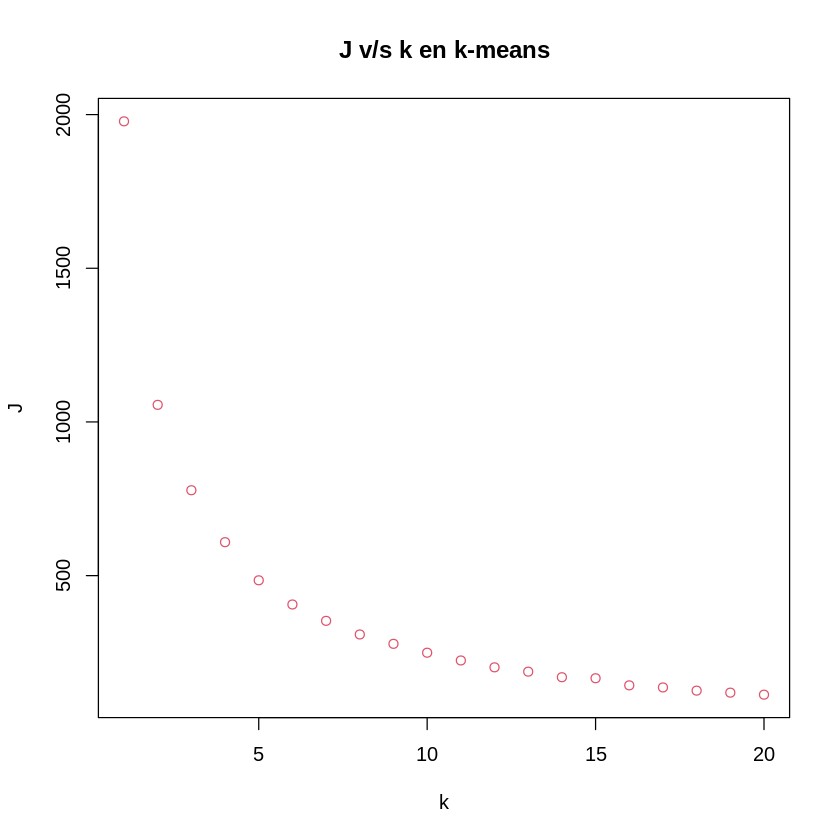

In [149]:
J<-rep(0,20)
fin_iter<-20
for (k in 1:fin_iter){
     cl<-kmeans(conjunto3,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

In [155]:
ki_3<-kideal(J,0.18)
ki_3

[1] 5

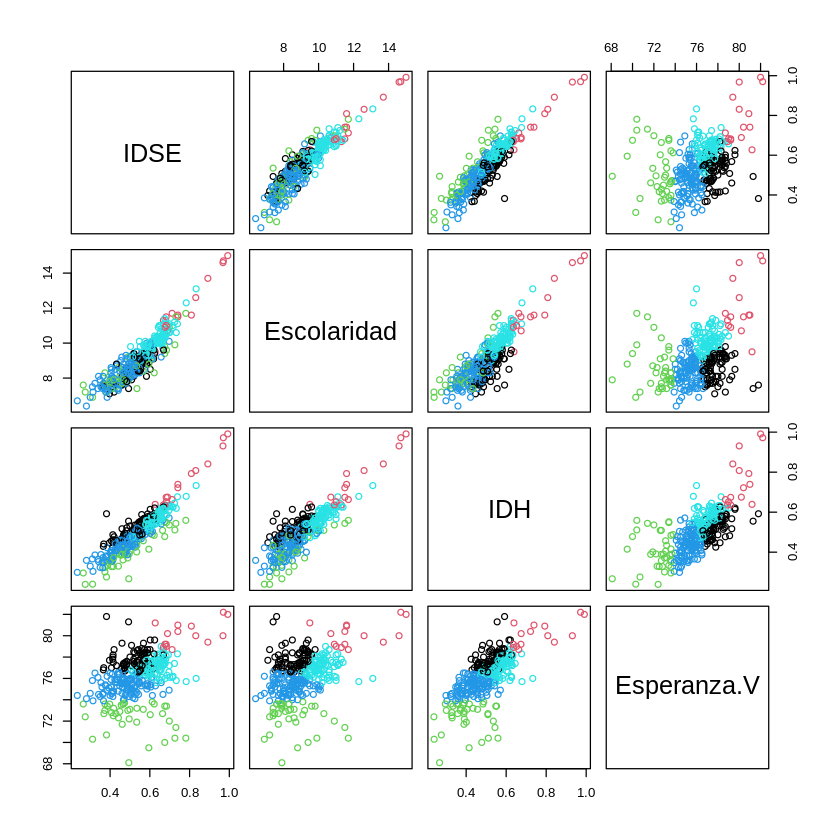

In [156]:
cl<-kmeans(conjunto3,ki_3,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(conjunto3,col=cl$cluster)

Por último, analizando los 4 elementos restantes, podemos observar una relación linear bastante predominantes entre el **índice de desarrollo humano** contra los otros tres datos. A más nivel de desarrollo, mayor posibilidad de acceso a condiciones dignas, una esperanza de vida más larga y mayores oportunidades socioeconómicas para la comuna, pudiendo registrar 5 grupos notorios en muchas de las comparaciones.

#### **Respuesta 2.3**

A partir del estudio anterior, queda claro que no existe un elemento predominanante en la caracterización de los posibles agrupamientos si hablamos de todos los datos, por lo que a la hora de estudiarlos, es necesario hacer una selección precisa de las variables asociadas a un problema en concreto.

Habiendo dicho esto, sí es posible determinar que variables tienen predominancia si se quiere analizar el estado socioeconómico de una comuna como lo hace el **índice de desarrollo humano** (con el potencial de un sector), la **pobreza** (con los tópicos de infraestructura asociados) y por último la **escolaridad**, que marca el futuro de muchos sectores limitando o abriendo oportunidades de mejores condiciones dignas.